In [20]:
# CELL 1 – Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

plt.style.use("default")


In [23]:
# CELL 2 – Load raw Zillow data and create yearly Colorado average

# Load full Zillow ZHVI dataset
df = pd.read_csv("/kaggle/input/zillow-home-value-index/ZHVI.csv")

# Rename the date column
df = df.rename(columns={'Unnamed: 0': 'Date'})

# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Select Colorado series
co = df[['Date', 'Colorado']].dropna()

# Convert monthly → yearly average
co_yearly = (
    co.groupby(co['Date'].dt.year)['Colorado']
      .mean()
      .reset_index()
)

# Rename
co_yearly.columns = ['Year', 'AveragePrice']

# Keep 2000–2025
co_yearly = co_yearly[(co_yearly['Year'] >= 2000) & (co_yearly['Year'] <= 2025)]

co_yearly.head()


,Year,AveragePrice
0,2000,184722.213460
1,2001,206692.691172
2,2002,218287.699080
3,2003,222626.628755
4,2004,227081.669078


In [29]:
# CELL 3 – Simple feature engineering
# Following instructor feedback, I added one simple feature to improve accuracy.

# Create a numeric index representing time progression
# (2000 → 0, 2001 → 1, ..., 2025 → 25)
co_yearly['Year_Index'] = np.arange(len(co_yearly))

co_yearly.head()


,Year,AveragePrice,Year_Index
0,2000,184722.213460,0
1,2001,206692.691172,1
2,2002,218287.699080,2
3,2003,222626.628755,3
4,2004,227081.669078,4


In [45]:
# CELL 4 – Train-test split (time-based)

# Features: Year and Year_Index
X = co_yearly[['Year', 'Year_Index']]
# Target: yearly average price
y = co_yearly['AveragePrice']

n = len(X)
train_size = int(n * 0.8)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_test  = X.iloc[train_size:]
y_test  = y.iloc[train_size:]

print("Training samples:", len(X_train))
print("Testing samples :", len(X_test))
print("Train years:", list(co_yearly['Year'].iloc[:train_size]))
print("Test years :", list(co_yearly['Year'].iloc[train_size:]))


Training samples: 20
Testing samples : 6
Train years: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Test years : [2020, 2021, 2022, 2023, 2024, 2025]


In [46]:
# CELL 5 – Baseline model: Linear Regression

model = LinearRegression()
model.fit(X_train, y_train)

print("Model intercept:", model.intercept_)
print("Model coefficients:", model.coef_)


Model intercept: -7865703.631080547
Model coefficients: [4022.10794364 4022.10794364]


In [47]:
# CELL 6 – Predict, evaluate, and show results

# 1. Predict on test set
y_pred = model.predict(X_test)

# 2. Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== Model Evaluation (Linear Regression) ===")
print("MAE :", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²  :", round(r2, 3))

# 3. Build results table
test_years = co_yearly['Year'].iloc[train_size:]

results = pd.DataFrame({
    "Year": test_years.values,
    "Actual": y_test.values,
    "Predicted": y_pred
})

print("\n=== Actual vs Predicted Home Prices (Test Set) ===")
print(results.to_string(index=False))


=== Model Evaluation (Linear Regression) ===
MAE : 152396.11
RMSE: 157442.18
R²  : -8.998

=== Actual vs Predicted Home Prices (Test Set) ===
 Year        Actual     Predicted
 2020 414574.695400 339396.573944
 2021 478941.262939 347440.789831
 2022 550436.180593 355485.005718
 2023 540078.538815 363529.221605
 2024 546531.749671 371573.437493
 2025 540856.890143 379617.653380


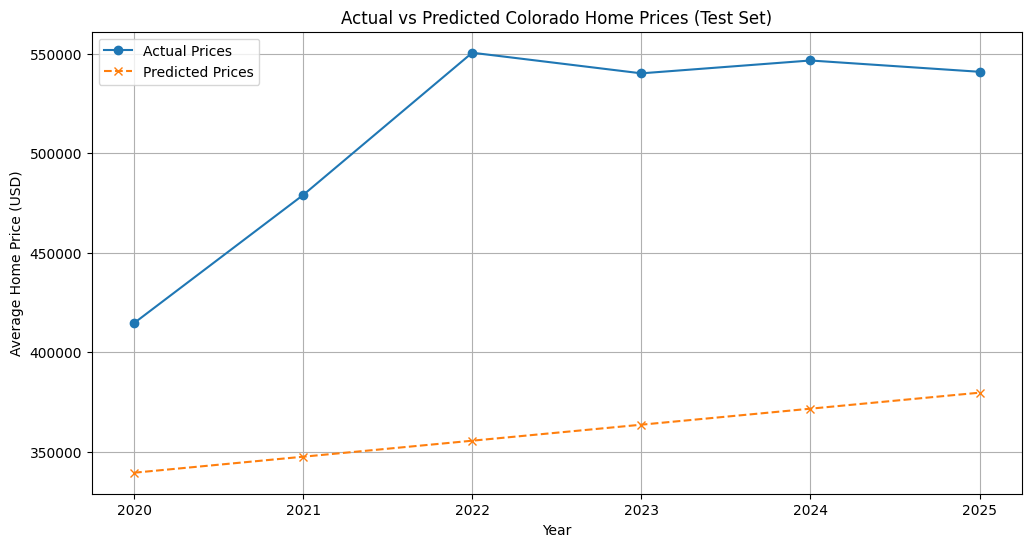

In [49]:
# CELL 7 – Plot actual vs predicted prices

test_years = co_yearly['Year'].iloc[train_size:]

plt.figure(figsize=(12,6))
plt.plot(test_years, y_test.values, marker='o', label='Actual Prices')
plt.plot(test_years, y_pred, marker='x', linestyle='--', label='Predicted Prices')

plt.title("Actual vs Predicted Colorado Home Prices (Test Set)")
plt.xlabel("Year")
plt.ylabel("Average Home Price (USD)")
plt.grid(True)
plt.legend()
plt.show()


Modeling Summary

This notebook builds a basic model to predict Colorado home prices from 2000–2025. I used two features: Year and Year_Index (0 to 25). Then I trained a Linear Regression model.

Steps I Did

Loaded the yearly Colorado home price data

Created a simple time feature (Year_Index)

Split the data into train and test sets

Trained a Linear Regression model

Made predictions for the test years

Calculated MAE, RMSE, and R²

Compared actual vs predicted prices and plotted the results

Results

The model follows the overall rising trend. It does well on smooth changes but struggles with sharp increases like 2020–2022.

Conclusion

This is a simple model that shows the general trend of Colorado home prices. It works well for long-term patterns and could be improved with more features later.